## Part 1

In [ ]:
from google.colab import files
files=files.upload()

In [ ]:
!pip install diffprivlib

In [ ]:
# Make Necessary import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

import diffprivlib.models as dp
import pickle

In [ ]:
#Read the data 
heart_data_df = pd.read_csv('heart_assignment2.csv')

In [ ]:
#Get the data
heart_data_df.head()

,Age,Sex,Race,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,Asian,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,Other,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,Other,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,White,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,Other,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Get the shape
print(heart_data_df.shape)

(918, 13)


In [ ]:
#Get the info regarding data
print(heart_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   Race            918 non-null    object 
 3   ChestPainType   918 non-null    object 
 4   RestingBP       918 non-null    int64  
 5   Cholesterol     918 non-null    int64  
 6   FastingBS       918 non-null    int64  
 7   RestingECG      918 non-null    object 
 8   MaxHR           918 non-null    int64  
 9   ExerciseAngina  918 non-null    object 
 10  Oldpeak         918 non-null    float64
 11  ST_Slope        918 non-null    object 
 12  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 93.4+ KB
None


In [ ]:
#Check whether there are duplicates in the data
print(heart_data_df.drop_duplicates(inplace=True))
print(heart_data_df.isna().sum())

None
Age               0
Sex               0
Race              0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


[Text(1, 0.5, 'Cholesterol'),
 Text(1, 1.5, 'MaxHR'),
 Text(1, 2.5, 'RestingBP'),
 Text(1, 3.5, 'FastingBS'),
 Text(1, 4.5, 'Age'),
 Text(1, 5.5, 'Oldpeak'),
 Text(1, 6.5, 'HeartDisease')]

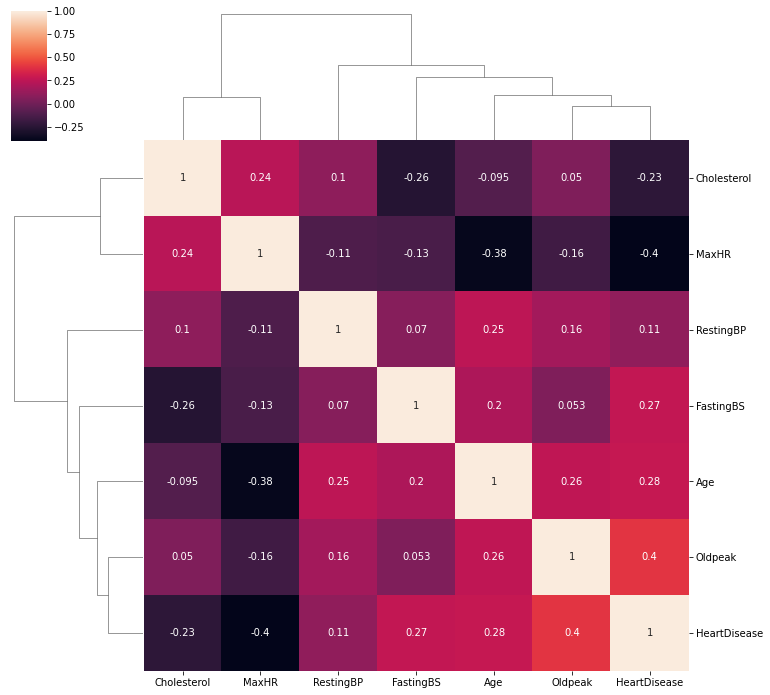

In [ ]:
#correlation between data
heart_data_corr = heart_data_df.corr()
plot_corr = sns.clustermap(data = heart_data_corr,
                           metric="correlation",
                           annot=True,
                           )
plot_corr.ax_heatmap.set_yticklabels(plot_corr.ax_heatmap.get_yticklabels(),
                                     rotation=0)

In [ ]:
#pre processing the data

le = LabelEncoder()
heart_data_encoded = heart_data_df
# Columns to encode are:
categ = ['Sex','Race','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'] 
# Label encoding
heart_data_encoded[categ] = heart_data_df[categ].apply(le.fit_transform)                 
heart_data_encoded

,Age,Sex,Race,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,1,140,289,0,1,172,0,0.0,2,0
1,49,0,3,2,160,180,0,1,156,0,1.0,1,1
2,37,1,3,1,130,283,0,2,98,0,0.0,2,0
3,48,0,4,0,138,214,0,1,108,1,1.5,1,1
4,54,1,3,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,2,0,144,193,1,1,141,0,3.4,1,1
915,57,1,4,0,130,131,0,1,115,1,1.2,1,1
916,57,0,3,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
heart_data_encoded.columns

Index(['Age', 'Sex', 'Race', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [ ]:
X, y = heart_data_encoded.drop(['HeartDisease'],axis=1), heart_data_encoded['HeartDisease']

#normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#splitting the data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=0)
# print(X_train, X_test, y_train, y_test)
print(X_train.shape, X_test.shape)

(734, 12) (184, 12)


## Question 4 Logistic Regression Classifier (Without DP)

Non-private test accuracy: 83.70%
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



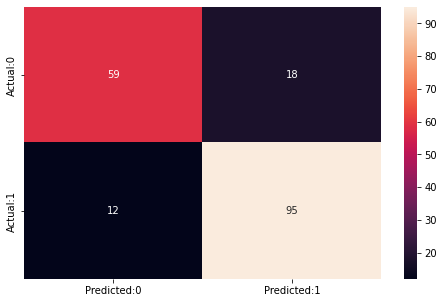

In [ ]:
#Train logistic regression classifier without DP
clf = LogisticRegression(solver="lbfgs")
clf.fit(X_train, y_train)

baseline = clf.score(X_test, y_test)
logreg_y_pred=clf.predict(X_test)
print("Non-private test accuracy: %.2f%%" % (baseline * 100))
print(classification_report(y_test, logreg_y_pred))

cm=confusion_matrix(y_test, logreg_y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'] , index=['Actual:0', 'Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')

## Question 5 Differential Privacy Model

Non-private test accuracy: 63.04%
              precision    recall  f1-score   support

           0       0.54      0.74      0.63        77
           1       0.75      0.55      0.63       107

    accuracy                           0.63       184
   macro avg       0.64      0.65      0.63       184
weighted avg       0.66      0.63      0.63       184



/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)


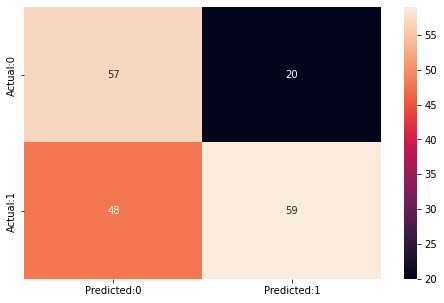

In [ ]:
#Train logistic regression classifier with DP
clf_dp = dp.LogisticRegression()
clf_dp.fit(X_train, y_train)

baseline_dp = clf_dp.score(X_test, y_test)
logreg_y_pred=clf_dp.predict(X_test)
print("Non-private test accuracy: %.2f%%" % (baseline_dp * 100))
print(classification_report(y_test, logreg_y_pred))

cm=confusion_matrix(y_test, logreg_y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'] , index=['Actual:0', 'Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')

In [ ]:
# #Calculate accuracy for different values of epsilon

accuracy = []
epsilons = np.logspace(-5, 8, 100)

for eps in epsilons:
    dp_clf = dp.LogisticRegression(epsilon=eps,data_norm=8)
    dp_clf.fit(X_train, y_train)
    accuracy.append(dp_clf.score(X_test, y_test))
#print(epsilons)

In [ ]:
pickle.dump((epsilons, baseline, accuracy), open("lr_accuracy.p", "wb" ) )

## Question 6 & 7 Accuracy Plot DP vs Non-DP Classifier, and how accuracy shifts with different values of epsilon

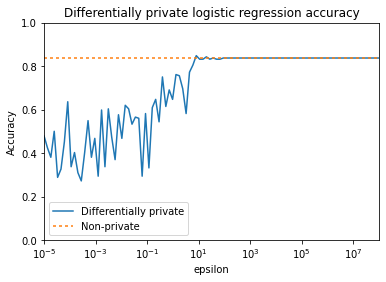

In [ ]:
#Plot accuracy with DP vs non-private accuracy 
epsilons, baseline, accuracy = pickle.load(open("lr_accuracy.p", "rb"))

plt.semilogx(epsilons, accuracy, label="Differentially private")
plt.plot(epsilons, np.ones_like(epsilons) * baseline, dashes=[2,2], label="Non-private")
plt.title("Differentially private logistic regression accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=3)
plt.show()